In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({"font.size":20})

In [2]:
data = pd.read_csv("20221129_benchmarks_timecourse.csv")
data = data.ffill(axis = 1)

data

,model name,N,max score,starting score,0,1,2,3,4,5,...,91,92,93,94,95,96,97,98,99,100
0,Aurora Kinase A in Neuroblastoma,23,115,67.7,90.9,90.9,95.5,96.0,99.0,100.0,...,111.0,111.0,111.0,111.0,111.0,111.0,111.0,111.0,111.0,111.0
1,Aurora Kinase A in Neuroblastoma,23,115,35.0,94.0,97.0,98.0,104.0,104.0,107.0,...,112.0,112.0,112.0,112.0,112.0,112.0,112.0,112.0,112.0,112.0
2,Aurora Kinase A in Neuroblastoma,23,115,34.0,63.0,80.9,82.8,85.5,91.8,93.8,...,107.0,107.0,107.0,107.0,107.0,107.0,107.0,107.0,107.0,107.0
3,B cell differentiation,22,110,65.7,91.6,91.6,97.6,97.6,101.7,105.7,...,107.0,107.0,107.0,107.0,107.0,107.0,107.0,107.0,107.0,107.0
4,B cell differentiation,22,110,56.4,82.0,86.1,91.4,98.0,99.1,100.4,...,107.0,107.0,107.0,107.0,107.0,107.0,107.0,107.0,107.0,107.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,Toll Pathway of Drosophila Signaling Pathway,11,55,40.0,44.0,44.0,44.0,51.0,51.0,55.0,...,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0
107,Toll Pathway of Drosophila Signaling Pathway,11,55,53.0,55.0,55.0,55.0,55.0,55.0,55.0,...,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0
108,VEGF Pathway of Drosophila Signaling Pathway,18,90,78.0,82.0,85.0,85.0,89.0,90.0,90.0,...,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0
109,VEGF Pathway of Drosophila Signaling Pathway,18,90,80.0,83.0,84.0,86.0,86.0,87.0,88.0,...,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0


In [3]:
start_end = data.groupby("model name").agg({"N": "first", "max score":"first", "starting score":["mean","std"], "100":["mean","std"]}).reset_index()

start_end.columns = pd.MultiIndex.from_tuples(
    [
        ( "name",      "",     ""),
        (    "N",      "",     ""),
        (  "max",      "",     ""),
        ("start",  "mean","score"),
        ("start",   "std","score"),
        (  "100",  "mean","score"),
        (  "100",   "std","score"),
    ],
)

start_end.insert(loc=start_end.columns.get_loc(("start","mean","score"))+1,
                 column = ("start","mean","per"),
                 value = start_end[("start","mean","score")]/start_end["max"]*100)
start_end.insert(loc=start_end.columns.get_loc(("start","std","score"))+1,
                 column = ("start","std","per"),
                 value = start_end[("start","std","score")]/start_end["max"]*100)
start_end.insert(loc=start_end.columns.get_loc(("100","mean","score"))+1,
                 column = ("100","mean","per"),
                 value = start_end[("100","mean","score")]/start_end["max"]*100)
start_end.insert(loc=start_end.columns.get_loc(("100",  "std","score"))+1,
                 column = ("100","std","per"),
                 value = start_end[("100","std","score")]/start_end["max"]*100)

start_end.to_csv("benchmarks_start_end.csv")

start_end



name   N  max       start  \
                                                                      mean   
                                                                     score   
0                    Aurora Kinase A in Neuroblastoma  23  115   45.566667   
1                              B cell differentiation  22  110        71.8   
2       BT474 Breast Cell Line Long-term ErbB Network  25  125        53.6   
3      BT474 Breast Cell Line Short-term ErbB Network  16   80        33.3   
4                            Budding Yeast Cell Cycle  20  100        49.0   
5                       Budding Yeast Cell Cycle 2009  18   90   16.333333   
6          CD4+ T Cell Differentiation and Plasticity  18   90   41.533333   
7                                 Cardiac development  15   75   55.333333   
8   Cell Cycle Transcription by Coupled CDK and Ne...   9   45         4.0   
9                           Cortical Area Development   5   25   20.666667   
10                           Death Receptor Signaling  28  140   55.266667   
11                                    FA BRCA pathway  28  140   47.333333   
12      FGF pathway of Drosophila Signalling Pathways  23  115   85.333333   
13             Fanconi anemia and checkpoint recovery  15   75   21.666667   
14    HCC1954 Breast Cell Line Long-term ErbB Network  25  125   54.533333   
15   HCC1954 Breast Cell Line Short-term ErbB Network  16   80   36.933333   
16        HH Pathway of Drosophila Signaling Pathways  24  120   70.666667   
17                    Human Gonadal Sex Determination  19   95   47.933333   
18  Iron acquisition and oxidative stress response...  22  110   55.666667   
19                                         Lac Operon  13   65   47.333333   
20                               Mammalian Cell Cycle  20  100   46.333333   
21                          Mammalian Cell Cycle 2006  10   50    9.333333   
22       Metabolic Interactions in the Gut Microbiome  12   60        45.4   
23                 Neurotransmitter Signaling Pathway  16   80        29.0   
24                           Oxidative Stress Pathway  19   95   45.333333   
25  Pro-inflammatory Tumor Microenvironment in Acu...  26  130   71.333333   
26  Processing of Spz Network from the Drosophila ...  24  120        97.0   
27  Regulation of the L-arabinose operon of Escher...  13   65        42.0   
28      SKBR3 Breast Cell Line Long-term ErbB Network  25  125   40.833333   
29     SKBR3 Breast Cell Line Short-term ErbB Network  16   80   31.466667   
30                             T cell differentiation  23  115   70.666667   
31        T-LGL Survival Network 2011 Reduced Network  18   90   21.733333   
32                             TOL Regulatory Network  24  120  101.333333   
33       Toll Pathway of Drosophila Signaling Pathway  11   55   45.666667   
34                    Trichostrongylus retortaeformis  26  130   37.266667   
35       VEGF Pathway of Drosophila Signaling Pathway  18   90        72.0   
36       Wg Pathway of Drosophila Signalling Pathways  26  130        84.0   

                                            100                        \
                     std                   mean                   std   
          per      score        per       score        per      score   
0   39.623188  19.174549  16.673521       110.0  95.652174   2.645751   
1   65.272727  19.191404  17.446731  107.666667  97.878788   1.154701   
2       42.88   4.582576   3.666061       122.0       97.6   2.000000   
3      41.625  13.363009  16.703761   77.266667  96.583333   1.616581   
4        49.0  13.856406  13.856406   95.333333  95.333333   5.033223   
5   18.148148  11.718931  13.021034        78.6  87.333333  10.690182   
6   46.148148  17.011859  18.902065   75.333333  83.703704   6.107645   
7   73.777778   2.516611   3.355482   73.333333  97.777778   2.886751   
8    8.888889   5.291503  11.758895        44.0  97.777778   1.000000   
9   82.666667   1.154701   4.618802   24.666667  98.

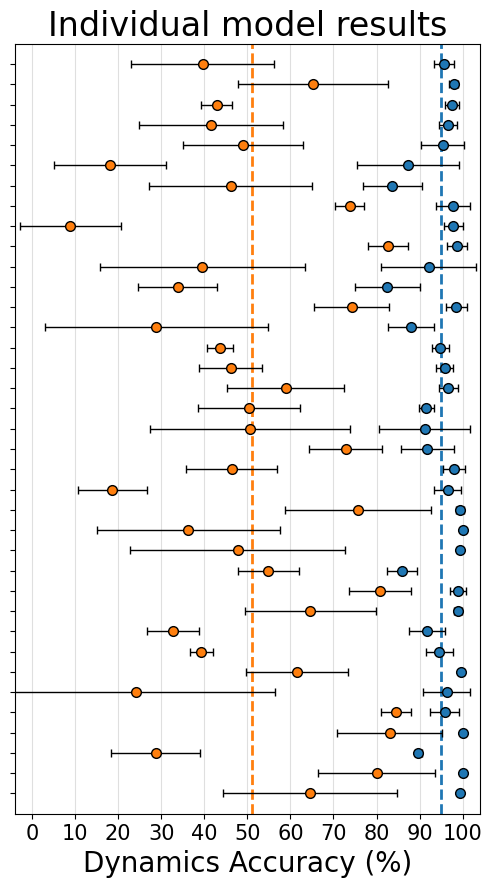

In [4]:
A_data = start_end
A_data.sort_values(by=["name"])
A_data.reset_index(inplace=True, drop=True)

fig = plt.figure(figsize =(6, 10))
ax = fig.add_subplot(111)

y = list(reversed(range(len(A_data))))

ax.errorbar(A_data[("100","mean","per")], y, xerr=A_data[("100","std","per")],
            fmt="o", ecolor="k", linewidth=1, capsize=3, markeredgecolor="k", zorder=10, markersize=7)
ax.errorbar(A_data[("start","mean","per")], y, xerr=A_data[("start","std","per")],
            fmt="o", ecolor="k", linewidth=1, capsize=3, markeredgecolor="k", zorder=10, markersize=7)

ax.set(xlim=(-4, 104), xticks=np.arange(0, 105, 10),
       ylim=(-1, len(A_data)), yticks=np.arange(0, len(A_data), 1))
     
ax.set_yticklabels([])
ax.set_xticklabels(labels=np.arange(0, 105, 10), fontsize=15)
ax.set_xlabel("Dynamics Accuracy (%)")

ax.vlines(A_data[("100","mean","per")].mean(),-1,len(A_data),linestyles="dashed",colors="#1f77b4",linewidths=2)
ax.vlines(A_data[("start","mean","per")].mean(),-1,len(A_data),linestyles="dashed",colors="#ff7f0e",linewidths=2)
ax.grid(axis='x', alpha=0.4)

plt.title("Individual model results")
     
# show plot
plt.show()

In [5]:
per_dict = {}

per_dict["start"] = data["starting score"]/data["max score"]*100

for i in range(101):
    per_dict[f"{i}"] = data[f"{i}"]/data["max score"]*100

per_df = pd.concat(per_dict.values(), axis=1)
per_df.columns = per_dict.keys()

per_df

,start,0,1,2,3,4,5,6,7,8,...,91,92,93,94,95,96,97,98,99,100
0,58.869565,79.043478,79.043478,83.043478,83.478261,86.086957,86.956522,88.695652,89.565217,90.434783,...,96.521739,96.521739,96.521739,96.521739,96.521739,96.521739,96.521739,96.521739,96.521739,96.521739
1,30.434783,81.73913,84.347826,85.217391,90.434783,90.434783,93.043478,93.913043,93.913043,94.782609,...,97.391304,97.391304,97.391304,97.391304,97.391304,97.391304,97.391304,97.391304,97.391304,97.391304
2,29.565217,54.782609,70.347826,72.0,74.347826,79.826087,81.565217,83.913043,85.043478,86.521739,...,93.043478,93.043478,93.043478,93.043478,93.043478,93.043478,93.043478,93.043478,93.043478,93.043478
3,59.727273,83.272727,83.272727,88.727273,88.727273,92.454545,96.090909,96.090909,97.272727,97.272727,...,97.272727,97.272727,97.272727,97.272727,97.272727,97.272727,97.272727,97.272727,97.272727,97.272727
4,51.272727,74.545455,78.272727,83.090909,89.090909,90.090909,91.272727,95.545455,96.727273,97.272727,...,97.272727,97.272727,97.272727,97.272727,97.272727,97.272727,97.272727,97.272727,97.272727,97.272727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,72.727273,80.0,80.0,80.0,92.727273,92.727273,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
107,96.363636,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
108,86.666667,91.111111,94.444444,94.444444,98.888889,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
109,88.888889,92.222222,93.333333,95.555556,95.555556,96.666667,97.777778,97.777778,98.888889,98.888889,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


In [6]:
averages = per_df.mean(axis=0)

stds = per_df.std(axis=0)

plot_data = pd.concat([averages, stds], axis=1)
plot_data.columns = ["average", "std"]

plot_data

,average,std
start,51.088748,23.552926
0,65.935739,19.626189
1,70.41048,18.473778
2,74.261178,16.945554
3,77.666047,16.199179
...,...,...
96,95.018353,5.979969
97,95.018353,5.979969
98,95.018353,5.979969
99,95.018353,5.979969


<module 'matplotlib.pyplot' from 'c:\\Users\\danie\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\pyplot.py'>

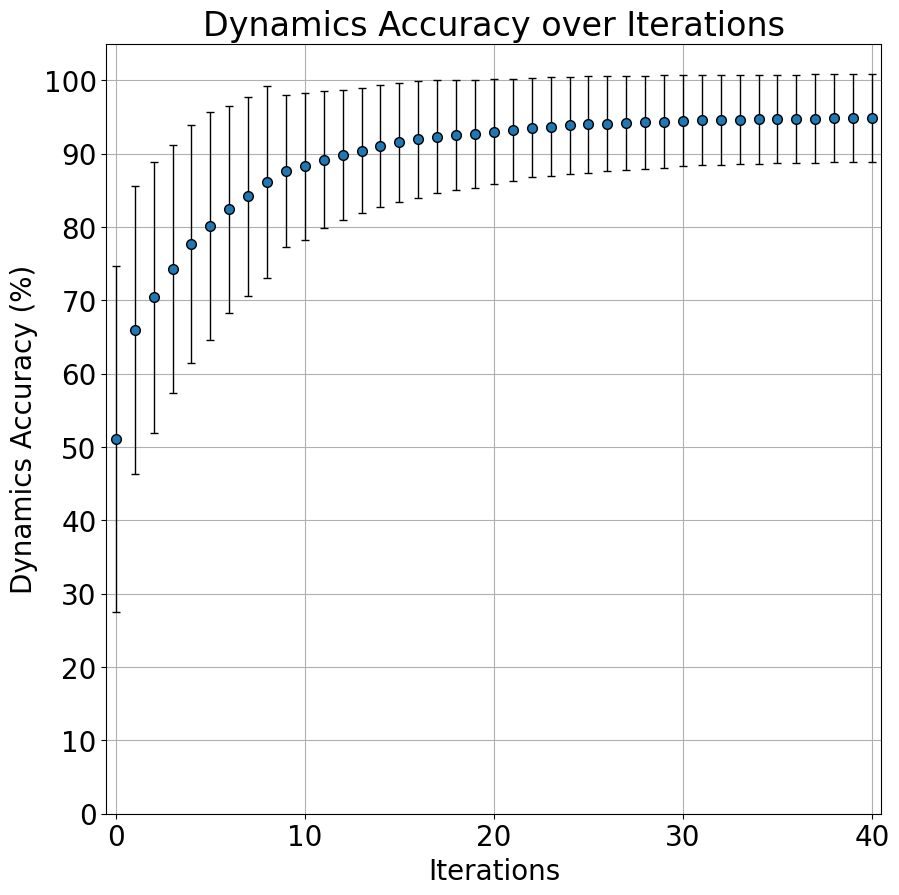

In [7]:
fig = plt.figure(figsize =(10, 10))
ax = fig.add_subplot(111)

x = plot_data.index
y = plot_data["average"]
ax.errorbar(x, y, yerr=plot_data["std"],
            fmt="o", ecolor="k", linewidth=1, capsize=3, markeredgecolor="k", markersize=7)

xmax = 40.5
ymax = 105

ax.set(xlim=(-0.5, xmax), ylim=(0, ymax))
ax.set_xlabel("Iterations")
ax.set_ylabel("Dynamics Accuracy (%)")

plt.title("Dynamics Accuracy over Iterations")
plt.yticks(np.arange(0, ymax+1, 10))
plt.xticks(np.arange(0, xmax+1, 10), labels=[f"{i}" for i in range(0,int(xmax+1),10)])
plt.grid()

plt

<module 'matplotlib.pyplot' from 'c:\\Users\\danie\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\pyplot.py'>

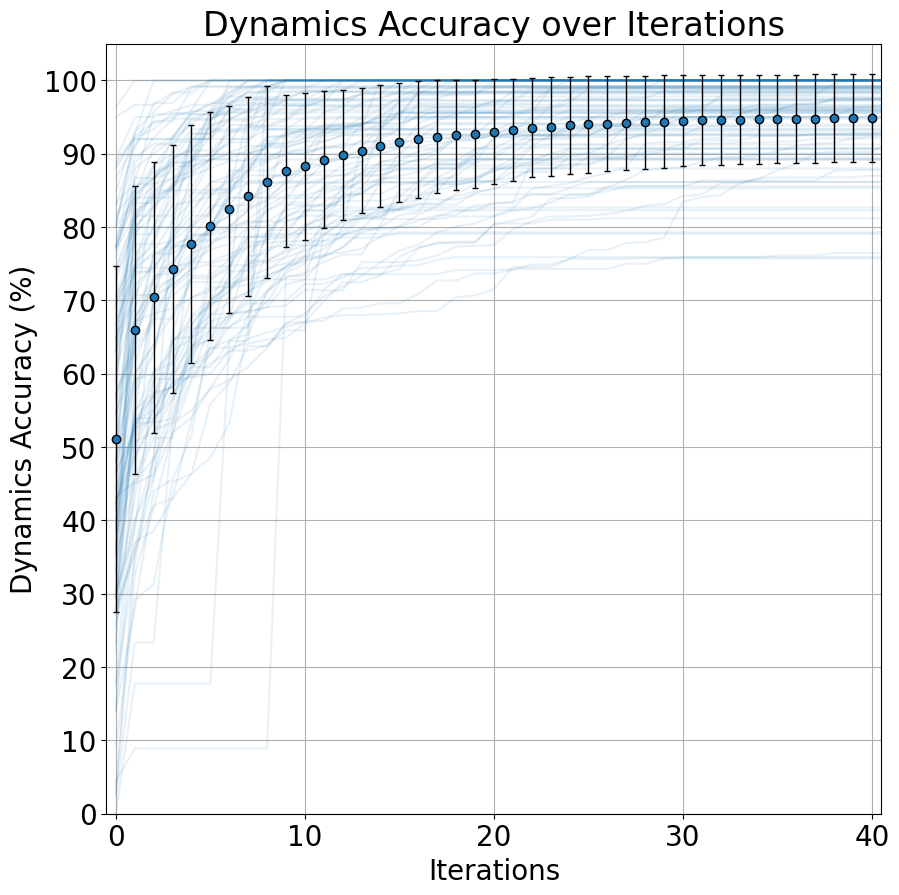

In [8]:
fig = plt.figure(figsize =(10, 10))
ax = fig.add_subplot(111)

x = plot_data.index
y = plot_data["average"]
ax.errorbar(x, y, yerr=plot_data["std"], fmt="o", ecolor="k", linewidth=1, capsize=2, markeredgecolor="k", zorder=10)
for i in range(len(per_df.index)):
    ax.plot(per_df.columns, per_df.iloc[i], color="#1f77b4", alpha=0.1)

xmax = 40.5
ymax = 105

ax.set(xlim=(-0.5, xmax), ylim=(0, ymax))
ax.set_xlabel("Iterations")
ax.set_ylabel("Dynamics Accuracy (%)")

plt.title("Dynamics Accuracy over Iterations")
plt.yticks(np.arange(0, ymax+1, 10))
plt.xticks(np.arange(0, xmax+1, 10), labels=[f"{i}" for i in range(0,int(xmax+1),10)])
plt.grid()

plt

In [9]:
per_avg_dict = {}

for i in range(0,110,3):
    per_avg_dict[f"{i}"] = per_df.loc[i:i+2,:].mean(axis=0)

per_avg_df = pd.concat(per_avg_dict, axis=1)
per_avg_df = per_avg_df.transpose()
# per_avg_df.columns = per_df.keys()

per_avg_df

,start,0,1,2,3,4,5,6,7,8,...,91,92,93,94,95,96,97,98,99,100
0,39.623188,71.855072,77.913043,80.086957,82.753623,85.449275,87.188406,88.84058,89.507246,90.57971,...,95.652174,95.652174,95.652174,95.652174,95.652174,95.652174,95.652174,95.652174,95.652174,95.652174
3,65.272727,83.606061,85.757576,90.0,92.30303,93.878788,95.484848,96.909091,97.69697,97.878788,...,97.878788,97.878788,97.878788,97.878788,97.878788,97.878788,97.878788,97.878788,97.878788,97.878788
6,42.88,53.306667,58.56,61.04,64.906667,70.826667,72.48,75.893333,76.48,79.52,...,97.6,97.6,97.6,97.6,97.6,97.6,97.6,97.6,97.6,97.6
9,39.47619,59.52381,64.595238,71.833333,75.47619,78.095238,79.833333,82.595238,83.119048,83.595238,...,92.095238,92.095238,92.095238,92.095238,92.095238,92.095238,92.095238,92.095238,92.095238,92.095238
12,33.809524,53.571429,61.642857,62.119048,69.404762,73.309524,73.309524,74.357143,75.166667,75.785714,...,82.547619,82.547619,82.547619,82.547619,82.547619,82.547619,82.547619,82.547619,82.547619,82.547619
15,74.202899,87.536232,90.144928,91.884058,93.333333,94.492754,94.782609,94.782609,97.971014,98.550725,...,98.550725,98.550725,98.550725,98.550725,98.550725,98.550725,98.550725,98.550725,98.550725,98.550725
18,43.626667,51.84,55.813333,61.36,64.0,66.346667,67.626667,69.013333,70.533333,71.866667,...,94.8,94.8,94.8,94.8,94.8,94.8,94.8,94.8,94.8,94.8
21,58.888889,74.166667,78.055556,81.666667,82.777778,84.444444,86.944444,89.444444,90.277778,91.388889,...,96.666667,96.666667,96.666667,96.666667,96.666667,96.666667,96.666667,96.666667,96.666667,96.666667
24,50.606061,74.939394,81.545455,83.666667,86.363636,86.969697,88.636364,88.939394,89.393939,89.69697,...,91.212121,91.212121,91.212121,91.212121,91.212121,91.212121,91.212121,91.212121,91.212121,91.212121
27,54.871795,67.179487,69.230769,70.25641,72.564103,73.589744,76.153846,78.717949,79.487179,80.512821,...,85.897436,85.897436,85.897436,85.897436,85.897436,85.897436,85.897436,85.897436,85.897436,85.897436


<module 'matplotlib.pyplot' from 'c:\\Users\\danie\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\pyplot.py'>

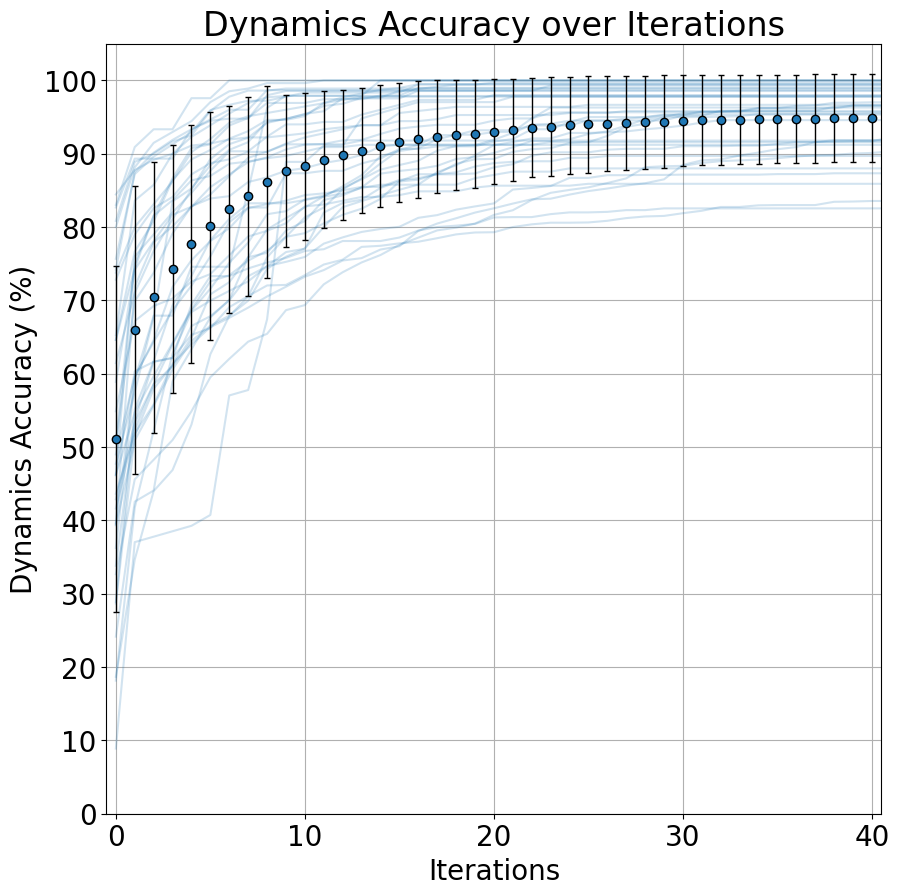

In [10]:
fig = plt.figure(figsize =(10, 10))
ax = fig.add_subplot(111)

x = plot_data.index
y = plot_data["average"]
ax.errorbar(x, y, yerr=plot_data["std"], fmt="o", ecolor="k", linewidth=1, capsize=2, markeredgecolor="k", zorder=10)
for i in range(len(per_avg_df.index)):
    ax.plot(per_avg_df.columns, per_avg_df.iloc[i], color="#1f77b4", alpha=0.2)

xmax = 40.5
ymax = 105

ax.set(xlim=(-0.5, xmax), ylim=(0, ymax))
ax.set_xlabel("Iterations")
ax.set_ylabel("Dynamics Accuracy (%)")

plt.title("Dynamics Accuracy over Iterations")
plt.yticks(np.arange(0, ymax+1, 10))
plt.xticks(np.arange(0, xmax+1, 10), labels=[f"{i}" for i in range(0,int(xmax+1),10)])
plt.grid()

plt